# Diferencialinės lygtys P2

Turinys:
- Diferencialinės lygtys su atsiskiriančiais kintamaisiais (komplikacijos)
- Trumpai apie Python'o ciklus ir sąrašus
- Pasiruošimas grafikai su Numpy
- Duomenų struktūros grafiniam vaizdavimui
- Grafinio vaizdavimo pagrindai
- Dvimačiai Numpy masyvai (trumpai)
- Diferencialinės lygties krypčių laukas

In [306]:
import sympy as sp

Kviesime Sympy komandas su sutrumptintu priešdėliu "sp".

Žinoma, mums reikės kelių simbolių.

In [307]:
x, y, C = sp.symbols("x y C")

# Diferencialinės lygtys su atsiskiriančiais kintamaisiais

Pratęsiant pirmos paskaitos paskutinę temą, nagrinėjame atvejus su komplikacijomis.

Sprendžiame lygtį $\ y\,y'=x$. 

Atskyrus kintamuosius gauname diferencilų lygtį $\ y\,dy = x\,dx\ $ integravimui. 

In [308]:
EQ = sp.Eq( sp.integrate(y,y), sp.integrate(x,x)+C )
EQ

Eq(y**2/2, C + x**2/2)

In [309]:
SPR = sp.solve(EQ,y)

Sympy išsprendžia teisingai: pateikia dvi sprendinių šakas.

Mes galime apjungti tas dvi šakas į bendrąjį sprendinį $\ y(x)=\pm \sqrt{x^2+C}$. 

In [310]:
SPR

[-sqrt(2*C + x**2), sqrt(2*C + x**2)]

In [311]:
SPR[0]

-sqrt(2*C + x**2)

In [312]:
SPR[1]

sqrt(2*C + x**2)

Kitas pavyzdys: sprendžiame $\ y'=2x\cos^2y$.

Atskyrus kintamuosius gauname diferencilų lygtį $\displaystyle\ \frac{dy}{\cos^2 x} = 2x\,dx\ $ integravimui. 

In [313]:
FQ = sp.Eq( sp.integrate( sp.cos(y)**(-2), y), sp.integrate(2*x,x)+C )
FQ

Eq(sin(y)/cos(y), C + x**2)

In [314]:
SP = sp.solve(FQ,y)

Sympy atsakymas yra sudėtingas, bet tik dvi šakos vietoj 
be galo daug šakų $\ y(x)=\arctan(x^2+C)+k\pi, k\in\mbox{Z}$,

jau nekalbant apie konstantinius sprendinius $\frac{\pi}2+k\pi, k\in\mbox{Z}$.

In [315]:
SP

[2*atan((sqrt(C**2 + 2*C*x**2 + x**4 + 1) - 1)/(C + x**2)),
 -2*atan((sqrt(C**2 + 2*C*x**2 + x**4 + 1) + 1)/(C + x**2))]

In [316]:
SP[0]

2*atan((sqrt(C**2 + 2*C*x**2 + x**4 + 1) - 1)/(C + x**2))

Bandome spręsti ir taip: mato tik vieną šaką. Tad Sympy nėra visagalis.

In [317]:
sp.solve( sp.Eq( sp.atan(y), x**2+C ),y)

[tan(C + x**2)]

# Trumpai apie Python'o ciklus ir sąrašus 

Python'o ciklas per (sveikųjų) skaičių eilutę naudojama iteravimo (konstruktoriaus) klasę "range".

"range(N)" atitinka skaičių eilutę 0, 1, 2, ..., N-1.

"range(a,b)" atitinka skaičių eilutę a, a+1, a+2, ..., b-1.

"range(a,b,c)" atitinka skaičių eilutę a, a+c, a+2c, ..., iki didžiausio šios progresijos skaičiaus mažesnio už b.

In [318]:
for k in range(1, 10):
    F = sp.factor(x**k-1)
    print(k,F)

1 x - 1
2 (x - 1)*(x + 1)
3 (x - 1)*(x**2 + x + 1)
4 (x - 1)*(x + 1)*(x**2 + 1)
5 (x - 1)*(x**4 + x**3 + x**2 + x + 1)
6 (x - 1)*(x + 1)*(x**2 - x + 1)*(x**2 + x + 1)
7 (x - 1)*(x**6 + x**5 + x**4 + x**3 + x**2 + x + 1)
8 (x - 1)*(x + 1)*(x**2 + 1)*(x**4 + 1)
9 (x - 1)*(x**2 + x + 1)*(x**6 + x**3 + 1)


Galime paversti "range" į sąrašą.

In [319]:
list(range(1,10))

[1, 2, 3, 4, 5, 6, 7, 8, 9]

In [320]:
list(range(1,10,2))

[1, 3, 5, 7, 9]

"range" nudojamas ir bendresnių sąrašų sudarymui. 

In [321]:
FL = [ sp.diff(x**k,x) for k in range(10) ]
FL

[0, 1, 2*x, 3*x**2, 4*x**3, 5*x**4, 6*x**5, 7*x**6, 8*x**7, 9*x**8]

Trečiasis "range" argumentas gali būti ir neigiamas.

"range(a,b,-c)" atitinka skaičių eilutę a, a-c, a-2c, ..., iki mažiausio šios progresijos skaičiaus didesnio už b.

"range(a,b,-1)" atitinka skaičių eilutę  b+1, b+2, ..., a  atbula tvarka.

In [322]:
list(range(10,3,-1))

[10, 9, 8, 7, 6, 5, 4]

Python'o sąrašų elementai yra numeruojami nuo nulio. Tad indeksas [n] reiškia (n+1)-ąjį elementą sąraše.

In [323]:
FL[3]

3*x**2

Sąrašų elementus galima numeruoti ir imti nuo galo. Paskutinis elementas turi indeksą [-1], ir t.t.

In [324]:
FL[-1],FL[-2]

(9*x**8, 8*x**7)

Sąrašų dalys kveičiamos taip:

[a:b] - visi elementai su indeksais [a], [a+1], [a+2], ..., [b-1]

[a:b:c] - visi elementai su indeksais [a], [a+c], [a+2c], ..., 
iki didžiausio indekso šioje progresijoje mažesnio už b.

Su neigiamu c:

[a:b:-c] - visi elementai su indeksais [a], [a-c], [a-2c], ..., 
iki mažiausio indekso šioje progresijoje didesnio už b.

Jeigu "a" praleistas, a=0 (kai c>0 ar praleistas), arba a=-1 (kai c<0).

Jeigu "b" praleistas, imami elementai iki galo (kai c>0), arba iki pradžios (kai c<0).

In [325]:
FL[3:5]

[3*x**2, 4*x**3]

In [326]:
FL[:7:2]

[0, 2*x, 4*x**3, 6*x**5]

In [327]:
FL[5::2]

[5*x**4, 7*x**6, 9*x**8]

In [328]:
FL[::3]

[0, 3*x**2, 6*x**5, 9*x**8]

In [329]:
FL[-2:2:-2]

[8*x**7, 6*x**5, 4*x**3]

Sąrašo perrašymas atbuline tvarka.

In [330]:
FL[::-1]

[9*x**8, 8*x**7, 7*x**6, 6*x**5, 5*x**4, 4*x**3, 3*x**2, 2*x, 1, 0]

# Pasiruošimas grafikai su Numpy

In [331]:
import numpy as np

Numpy yra skirtas skaičiavimams su realių (arba sveikųjų, ar kompleksinių) skaičių masyvais. 
Paprasta sintakse galimos aritmetinės ir funkcinės operacijos su ištisais skaičių masyvais, 
taip išvengiant tiesioginio ciklų programavimo.

Sukurti Numpy masyvą galima iš Python'o sąrašo. Pvz., imame pirminių skaičių sąrašą.

In [332]:
P = [2,3,5,7,11,13]
P

[2, 3, 5, 7, 11, 13]

In [333]:
Q = np.array([2,3,5,7,11,13])
Q

array([ 2,  3,  5,  7, 11, 13])

Aritmetinės operacijos su vienu masyvu: dauginame iš skaičiaus, pridedame skaičių, keliame kvadratu, ir t.t.

In [334]:
2*Q

array([ 4,  6, 10, 14, 22, 26])

In [335]:
Q+10

array([12, 13, 15, 17, 21, 23])

In [336]:
Q**2

array([  4,   9,  25,  49, 121, 169])

In [337]:
Q*Q

array([  4,   9,  25,  49, 121, 169])

In [338]:
2**Q

array([   4,    8,   32,  128, 2048, 8192], dtype=int32)

Su Python'o sąrašais artimentinės operacijos negalimos, arba turi kitą prasmę

In [339]:
2*P

[2, 3, 5, 7, 11, 13, 2, 3, 5, 7, 11, 13]

In [340]:
P+P

[2, 3, 5, 7, 11, 13, 2, 3, 5, 7, 11, 13]

P+10

Kitas svarbus skirtumas tarp Python'o sąrašų ir Numpy masyvų:

Numpy masyvo elementai turi tą patį tipą. Masyvo elementų galimi tipai yra riboti: int, uint, bool, float, complex; *taip pat fiksuoto dydžio atmintyje:* int8, int16, int32, int64; float16,float32,float64,float128, ir pan.

Čia daugiau Numpy masyvų apibrėžimų, pvz., to paties dydžio kaip Q. Skaičių tipą masyvuose galima kontroliuoti.

In [341]:
np.ones(Q.size)

array([1., 1., 1., 1., 1., 1.])

np.ones(6, dtype=np.int)

In [342]:
np.zeros(8, dtype=np.int64)

array([0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

# Duomenų struktūros grafiniam vaizdavimui

Reikiamos koordinačių ir funkcijų skaitinės reikšmės pildomos į Numpy masyvus.

Koordinačių ašių reikšmėms naudojama Numpy komandos "numpy.arrange()" arba "numpy.linspace()".

"numpy.arrange" yra labai panaši (argumentais) į Python'o "range()", bet argumentai gali būti realūs skaičiai
(ir rezultatas yra iš karto masyvas, o ne iteratyvinis objektas). 

In [343]:
np.arange(1, 10)

array([1, 2, 3, 4, 5, 6, 7, 8, 9])

In [344]:
np.arange(0.5, 10)

array([0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5, 7.5, 8.5, 9.5])

In [345]:
np.arange(0.5, 10, 1.5)

array([0.5, 2. , 3.5, 5. , 6.5, 8. , 9.5])

Tokius masyvys vadinkime *koordinatiniais.*

Numpy komanda "numpy.linspace(a,b,n)" yra labai panaši į "numpy.arange(a,b,h)", bet: 
- trečiasis argumentas užduoda taškų skaičių koordinatiniame masyve. 
- antrasis argumentas yra įtraukiamas į masyvo galą.

Atitinkami šuoliai tarp taškų paskaičiuojami kaip h=(b-a)/(n-1).

In [346]:
np.linspace(0,10,10)

array([ 0.        ,  1.11111111,  2.22222222,  3.33333333,  4.44444444,
        5.55555556,  6.66666667,  7.77777778,  8.88888889, 10.        ])

In [347]:
X = np.linspace(0,10,21)
X

array([ 0. ,  0.5,  1. ,  1.5,  2. ,  2.5,  3. ,  3.5,  4. ,  4.5,  5. ,
        5.5,  6. ,  6.5,  7. ,  7.5,  8. ,  8.5,  9. ,  9.5, 10. ])

Masyvams galima pritaikyti aritmetines operacijas ir nemažai standartinių (ir ne tik) funkcijų: 
sqrt, exp, log, log2, log10, cos, sin, tan, arccos, arcsin, arctan, ir pan. 

Apibrėžiame funkcijas $\ y(x)=\sqrt{x}\ $ ir $\displaystyle\ z(x)=\frac{3x+\sqrt{x}}{x+1},\ $ 
iš karto kaip jų reikšmių masyvus.

In [348]:
Y = np.sqrt(X)
Y

array([0.        , 0.70710678, 1.        , 1.22474487, 1.41421356,
       1.58113883, 1.73205081, 1.87082869, 2.        , 2.12132034,
       2.23606798, 2.34520788, 2.44948974, 2.54950976, 2.64575131,
       2.73861279, 2.82842712, 2.91547595, 3.        , 3.082207  ,
       3.16227766])

In [349]:
Z = (3*X+1)/(X+1)
Z

array([1.        , 1.66666667, 2.        , 2.2       , 2.33333333,
       2.42857143, 2.5       , 2.55555556, 2.6       , 2.63636364,
       2.66666667, 2.69230769, 2.71428571, 2.73333333, 2.75      ,
       2.76470588, 2.77777778, 2.78947368, 2.8       , 2.80952381,
       2.81818182])

# Grafinio vaizdavimo pagrindai

Naudojama biblioteka "matplotlib". Patogu trumpinti priešdėlį jos sub-paketui "matplotlib.pyplot"

In [350]:
import matplotlib as mpl
import matplotlib.pyplot as plt

Tiesioginis būdas sukurti grafinį paveiskliuką, funkcijų $y(x)$ ir $z(x)$ grafikams 

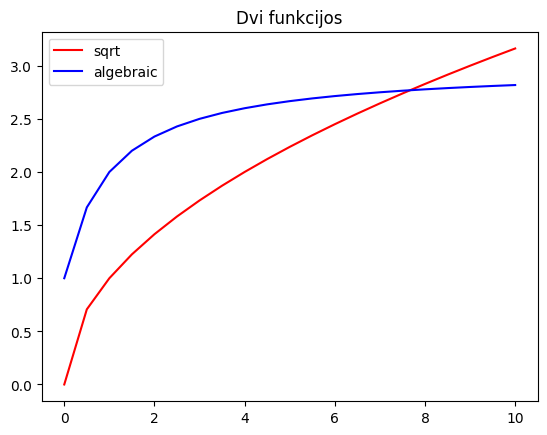

In [351]:
plt.figure()
plt.title("Dvi funkcijos")
plt.plot(X,Y,color="red",label="sqrt")
plt.plot(X,Z,color="blue",label="algebraic")
plt.legend()
plt.show()

Reikėtų pasmulkinti X-o ašį, nes kairėj pusėj matosi laužtė.

Arba gudriai: x=0 yra singuliarus taškas kvadratinės šaknies funkcijai, 
todėl skaitinio tolydumo problemos arti x=0. 
Atvirkštinė funkcija x(y)=y^2 yra be singularumų, todėl koordinatiniui masyvui naudojame y-reikšmes, 
o x-reikšmes masyve X skaičiuojame per atvirkštinę funkciją x(y)=y^2.

Nepamirštame atitinkamai pakeisti Y-masyvo didžiausią reikšmę:  3.4 o ne 10.

In [352]:
Y = np.linspace(0, 3.4, 21)
X = Y**2
Z = (3*X+Y)/(X+1)

Gaunasi gan tolydžiai ir nesmulkinant koordinačių, t.y., nedidinant masyvų dydžio.

Sukeitėme ir grafikų braižymo tvarką, kad raudonas dengtų mėlyną prie susikirtimų.

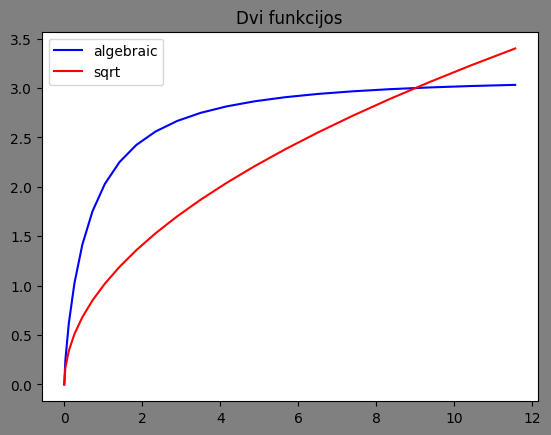

In [353]:
plt.figure( facecolor="gray" )
plt.title("Dvi funkcijos")
plt.plot(X,Z,color="blue",label="algebraic")
plt.plot(X,Y,color="red",label="sqrt")
plt.legend()
plt.show()

Principinis grafinio vaizdavimo programavimas:
- Visas paveiksliukas turi tipą "Figure" (žr. pilką dalį paskutinėje figūroje)
- Atskiri grafikų vaizdai (su fiksuotomis koordinačių ašimis) turi  tipą "Axes";
- Dauguma grafinių specifikacijų pritaikomos tipui "Axes".

Kol kas naudojame vieną "Axis" vaizdą visam "Figure" paveiksliukui.

Pateikiamas principinis grafinio vaizdo programavimo būdas:

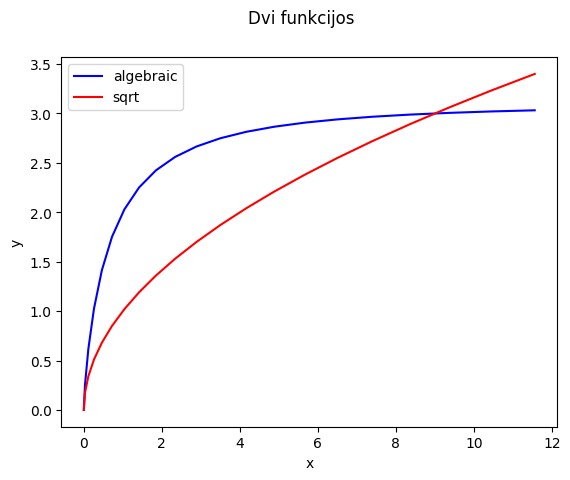

In [354]:
fig, ax = plt.subplots()
fig.suptitle("Dvi funkcijos")
ax.plot(X,Z,color="blue",label="algebraic")
ax.plot(X,Y,color="red",label="sqrt")
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.legend()

# Dvimačiai Numpy masyvai (trumpai)

Krypčių laukui braižyti reikės dvimačių masyvų. 
Čia demonstruojame išplėtimą nuo vienmačio masyvo į dvimatį masyvą, pagal x-o arba y-o kryptis (taip sakant).

In [355]:
U = np.array([-2,0,2,4])
V = np.array([-1,1,3,5])

In [356]:
U2, V2 = np.meshgrid(U,V)

In [357]:
U2

array([[-2,  0,  2,  4],
       [-2,  0,  2,  4],
       [-2,  0,  2,  4],
       [-2,  0,  2,  4]])

In [358]:
V2

array([[-1, -1, -1, -1],
       [ 1,  1,  1,  1],
       [ 3,  3,  3,  3],
       [ 5,  5,  5,  5]])

Kol kas mums užteks tik šio išplėtimo ir aritmetinių operacijų su dvimačiais masyvais.

Šis pavyzdys atitinka dviejų kintamųjų funkciją F(u,v) = u + 2v.

In [359]:
U2 + 2*V2

array([[-4, -2,  0,  2],
       [ 0,  2,  4,  6],
       [ 4,  6,  8, 10],
       [ 8, 10, 12, 14]])

Sudėjus (atitinkamo dydžio) vektorių ir matricą, vektorius interpretuojamas kaip horizontali eilutė, kuri pridedama prie matricos eilučių

In [360]:
U + V2

array([[-3, -1,  1,  3],
       [-1,  1,  3,  5],
       [ 1,  3,  5,  7],
       [ 3,  5,  7,  9]])

In [361]:
U2 + V

array([[-3,  1,  5,  9],
       [-3,  1,  5,  9],
       [-3,  1,  5,  9],
       [-3,  1,  5,  9]])

# Diferencialinės lygties krypčių laukas

Nagrinėjame šią diferencialinę lygtį:  y' = y - x^2

In [362]:
def F(x,y):
    return y - x**2

Apibrėžiame koordinatines funkcijas ir gardelę. Koordinatinius masyvus išplėčiame į dvimačius.

In [363]:
X = np.linspace(-3,3,20)
Y = np.linspace(-2,4,20)

In [364]:
X2, Y2 = np.meshgrid(X,Y)

Suskaičiuojame išvestinių reikšmes visam dvimačiui masyvui

In [365]:
FY = F(X2,Y2)

Krypčių lauko vektoriai bus (1, F(x,y)), kur F(x,y) jau suskaičiavome masyve FY.

Belieka paruošti dvimatį vienetų masyvą.

In [366]:
FX = np.ones((20,20))

Jau galime braižyti krypčių lauką (kad ir su nelygiais vektoriais).

Naudojame komandą "plt.quiver()" vektoeių laukams braižyti. Pirmi keturi argumentai yra to paties dydžio dvimačiai masyvai.

Figūros forma (kvadratinė) ir dydis kontroliuojami su "figsize". Pagal specifikacijas, dydžiai turėtų būti coliais, bet Jupyter'yje kažkodėl ne taip. Net "dpi=100" (ar pan.) keičia dydį.

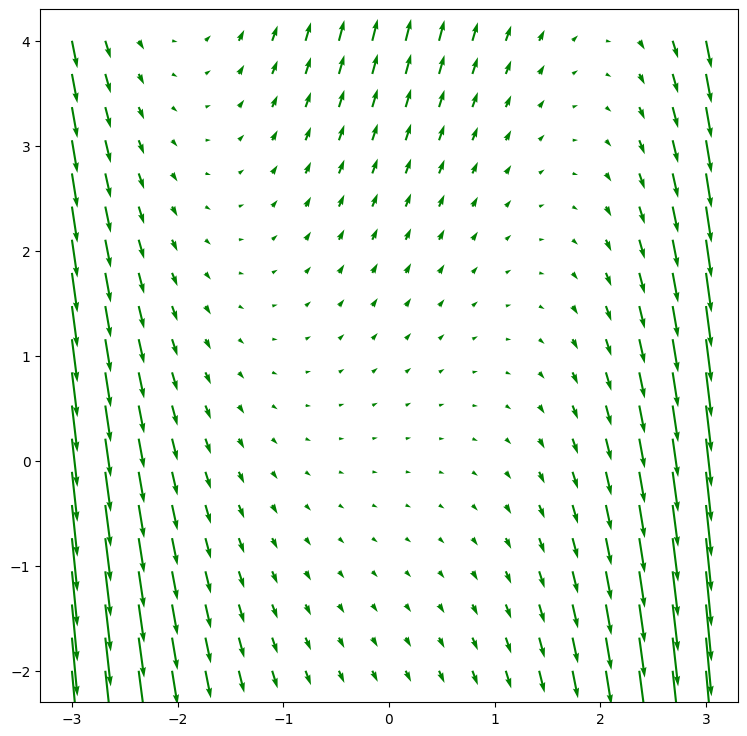

In [367]:
plt.figure( figsize=(9,9) )
plt.quiver(X2,Y2,FX,FY,color="green")
plt.show()

Taisyklingesnis krypčių laukas būtų su vienodo ilgio vektoriais. 
Tam mes normalizuojame krypčių vektorius (FX[i,j],FY[i,j]) paskaičiavę vektorių ilgių masyvą FD. 
Gauname normalizuotą vektorių lauką (GX[i,j],GY[i,j]).

In [368]:
FD = np.sqrt(FX**2 + FY**2)

In [369]:
GX = FX/FD
GY = FY/FD

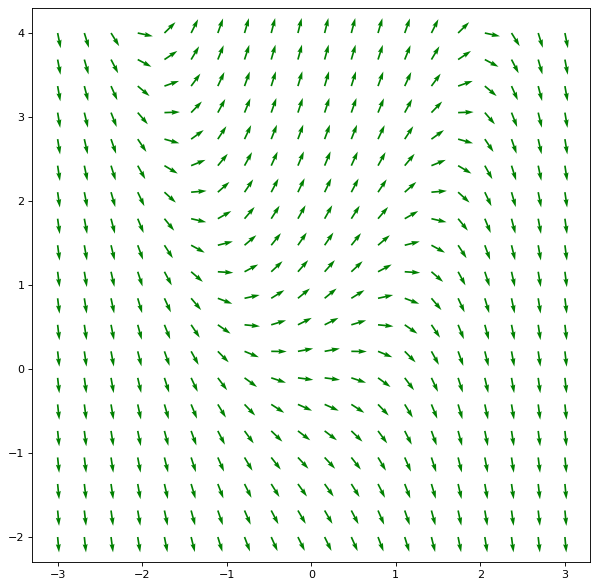

In [370]:
plt.figure(figsize=(9,9),dpi=80)
plt.quiver(X2,Y2,GX,GY,color="green")
plt.show()

Diferencialinės lygties krypčių laukui užtenka ir trumpų atkarpų (vietoj vektorių).
Tai nubraižome su tiesioginiais ciklais.

Su "h" kontroliuojame atkarpų ilgį.

Atkarpas brėžiame kaip tiesines funkcijas; užtenka pateikti dviejų (galutinių) taškų koordinates. Tų atkarpų masyvus VX, VY apibrėžiame naudodami "np.linspace" arba "np.array".

Atkreipiame dėmesį: GX,GY eilutės atitinka fiksuotą y-koordinatę, o stulpeliai atitinka fiksuotą x-koordinatę. 
Todėl GX, GY reikšmes kviečiame G[j,i], o ne G[i,j].

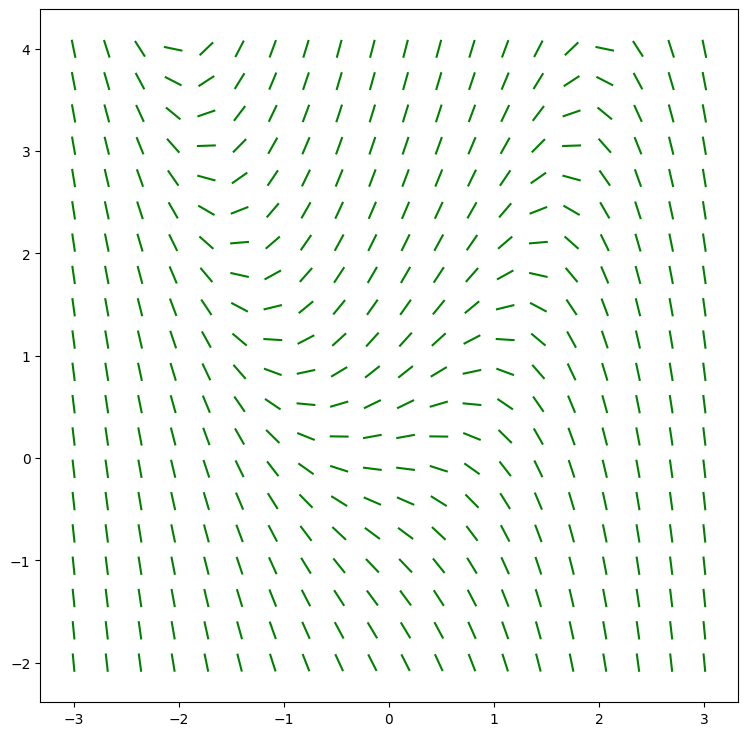

In [371]:
plt.figure(figsize=(9,9))
h = 0.16
for i in range(len(X)):
    for j in range(len(Y)):
        VX = np.linspace( X[i]-h/2*GX[j,i], X[i]+h/2*GX[j,i], 2)
        VY = np.array( [ Y[j]-h/2*GY[j,i], Y[j]+h/2*GY[j,i] ] )
        plt.plot(VX, VY, color="green")
plt.show()

# Užduotys

1. Taip vadinami Hermito polinomai apibrėžiami rekursija (su išvestine): $H_0(x) = 1$, $H_{n+1}(x)=x\,H_n(x)-H'_n(x)$. 

1(a). Naudodamiesi Python'o ciklu "for", paskaičiuokite Hermito polinomus $H_1(x),\ldots,H_{6}(x)$.  

1(b). Nubrėžkite Hermito polinomų $H_2(x),\ldots,H_{5}(x)$ grafikus intervale $[-2,3]$, vienoej figūroje.

2. Nubrėžkite diferencialinių lygčių $\ y'=y^2+x^2-1\ $ bei $\ 2(y+y')=x+3\ $  krypčių laukus pasirinktose apibrėžimo srityse. Tai tos pačios diferencilinės lygtys kaip ir antros paskaitos užduotyse. 

In [5]:
import sympy as sp
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

In [6]:
x = sp.Symbol("x", real=True)
n = sp.Symbol("n", integer=True, positive=True)
H0 = 1
Hn = sp.Function("H_n")(x)
Hn1 = sp.Function("H_{n+1}")(x)
relation = sp.Eq(Hn1, x*Hn - sp.diff(Hn,x))
relation

Eq(H_{n+1}(x), x*H_n(x) - Derivative(H_n(x), x))

In [7]:
next_h = H0
polynomials = []
for i in range(1,7):
    next_h = sp.simplify(relation.subs({Hn: next_h}).rhs)
    if i >= 2 and i <= 5:
        polynomials.append(next_h)
    display(next_h)

x

x**2 - 1

x**3 - 3*x

x**2*(x**2 - 3) - 3*x**2 + 3

x**5 - 10*x**3 + 15*x

-x**4 + x**2*(x**4 - 10*x**2 + 15) + 10*x**2 - x*(4*x**3 - 20*x) - 15

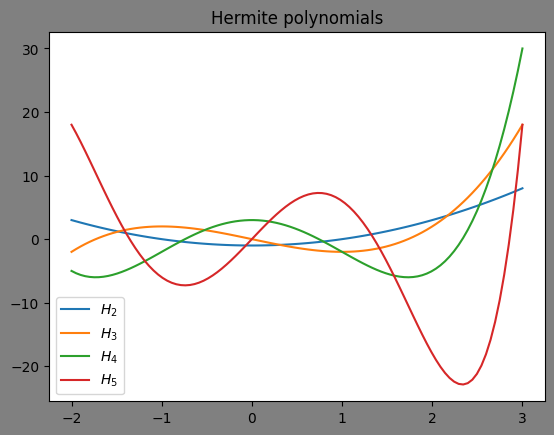

In [8]:
plt.figure( facecolor="gray" )
plt.title("Hermite polynomials")
X = np.linspace(-2,3,100)
for index, pol in enumerate(polynomials):
    Y = sp.lambdify(x, pol)(X)
    plt.plot(X,Y, label=f"$H_{index+2}$")
plt.legend()
plt.show()

$\ y'=y^2+x^2-1\ $ bei $\ 2(y+y')=x+3\ $

In [14]:
def F(x,y):
    return y**2 + x**2 -1
def G(x,y):
    return (x+3)/2 - y
SIZE = 30

In [15]:
X = np.linspace(-2,2,SIZE)
Y = np.linspace(-2,2,SIZE)
X2,Y2 = np.meshgrid(X,Y)

In [16]:
FY = F(X2,Y2)
GY = G(X2,Y2)
FX = np.ones((SIZE,SIZE))
GX = np.ones((SIZE,SIZE))
FD = np.sqrt(FX**2 + FY**2)
GD = np.sqrt(GX**2 + GY**2)
FX = FX/FD
FY = FY/FD
GX = GX/GD
GY = GY/GD

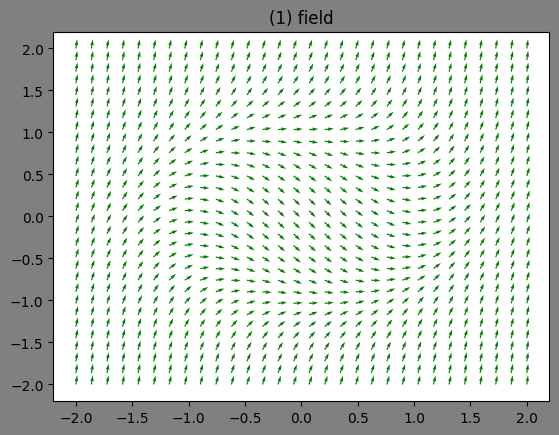

In [17]:
plt.figure(facecolor="gray")
plt.title("(1) field")
plt.quiver(X,Y,FX,FY, color="green")
plt.show()

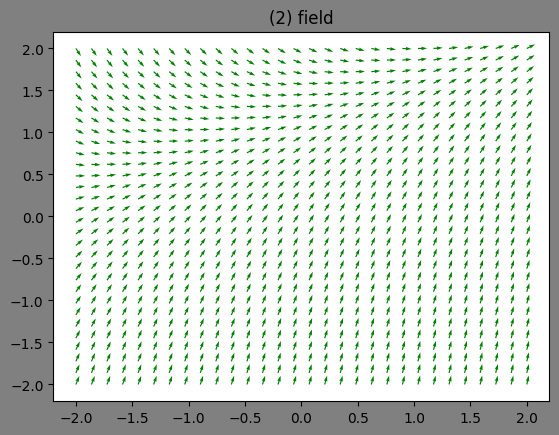

In [18]:

plt.figure(facecolor="gray")
plt.title("(2) field")
plt.quiver(X,Y,GX,GY, color="green")
plt.show()